<a href="https://colab.research.google.com/github/sumit9348/stock-prediction-using-machine-learning-/blob/main/Learner_Notebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [4]:
 #Initializing Plotly
 import plotly.io as pio 
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [5]:
df= pd.read_csv("TSLA.csv")

In [6]:
#read_csv function from pandas

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-15,56.702000,56.743999,54.880001,55.085999,55.085999,73927500
1,2019-03-18,55.200001,55.610001,53.459999,53.897999,53.897999,51405000
2,2019-03-19,53.500000,54.660000,52.692001,53.493999,53.493999,59003000
3,2019-03-20,53.938000,54.993999,53.259998,54.720001,54.720001,34541000
4,2019-03-21,54.520000,55.290001,53.689999,54.804001,54.804001,29735500
...,...,...,...,...,...,...,...
247,2020-03-09,121.078003,132.600006,121.000000,121.599998,121.599998,85368500
248,2020-03-10,131.886002,133.600006,121.599998,129.065994,129.065994,77972000
249,2020-03-11,128.039993,130.716003,122.599998,126.846001,126.846001,66612500
250,2020-03-12,116.178001,118.900002,109.250000,112.110001,112.110001,94545500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,68.499500,70.117468,66.979587,68.620825,68.620825,5.832381e+07
std,35.167728,36.726913,33.619944,35.141451,35.141451,3.923182e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,1.232800e+07
25%,46.246501,46.954001,45.502499,46.444001,46.444001,3.283962e+07
50%,51.986000,52.796002,51.267001,52.059000,52.059000,4.633075e+07
75%,71.250000,72.316998,70.684504,71.734500,71.734500,7.114762e+07
max,184.699997,193.798004,180.203995,183.483994,183.483994,3.046940e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [10]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [11]:
px.area(df, x="Date", y="Close")

In [12]:
px.line(df, x="Date", y="Close")

In [13]:
px.area(df, x="Date", y="Volume")

In [14]:
px.bar(df, y="Volume")

In [15]:
px.box(df, y="Close")

## Data Preperation

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-15,56.702000,56.743999,54.880001,55.085999,55.085999,73927500
1,2019-03-18,55.200001,55.610001,53.459999,53.897999,53.897999,51405000
2,2019-03-19,53.500000,54.660000,52.692001,53.493999,53.493999,59003000
3,2019-03-20,53.938000,54.993999,53.259998,54.720001,54.720001,34541000
4,2019-03-21,54.520000,55.290001,53.689999,54.804001,54.804001,29735500
...,...,...,...,...,...,...,...
247,2020-03-09,121.078003,132.600006,121.000000,121.599998,121.599998,85368500
248,2020-03-10,131.886002,133.600006,121.599998,129.065994,129.065994,77972000
249,2020-03-11,128.039993,130.716003,122.599998,126.846001,126.846001,66612500
250,2020-03-12,116.178001,118.900002,109.250000,112.110001,112.110001,94545500


In [17]:
  columns=['Date',"Close"]
  ndf=pd.DataFrame(df, columns=columns)

In [18]:
ndf

,Date,Close
0,2019-03-15,55.085999
1,2019-03-18,53.897999
2,2019-03-19,53.493999
3,2019-03-20,54.720001
4,2019-03-21,54.804001
...,...,...
247,2020-03-09,121.599998
248,2020-03-10,129.065994
249,2020-03-11,126.846001
250,2020-03-12,112.110001


In [19]:
prophet_df=ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [20]:
prophet_df

,ds,y
0,2019-03-15,55.085999
1,2019-03-18,53.897999
2,2019-03-19,53.493999
3,2019-03-20,54.720001
4,2019-03-21,54.804001
...,...,...
247,2020-03-09,121.599998
248,2020-03-10,129.065994
249,2020-03-11,126.846001
250,2020-03-12,112.110001


## Creating Facebook Prophet Model

In [21]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [22]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-15,53.490615,40.032528,66.015489,53.490615,53.490615,-1.223795,-1.223795,-1.223795,-1.223795,-1.223795,-1.223795,0.0,0.0,0.0,52.266820
1,2019-03-18,53.195792,39.475861,67.007813,53.195792,53.195792,-0.430858,-0.430858,-0.430858,-0.430858,-0.430858,-0.430858,0.0,0.0,0.0,52.764935
2,2019-03-19,53.097518,40.045093,68.113592,53.097518,53.097518,0.430875,0.430875,0.430875,0.430875,0.430875,0.430875,0.0,0.0,0.0,53.528393
3,2019-03-20,52.999244,40.151338,66.921301,52.999244,52.999244,0.326403,0.326403,0.326403,0.326403,0.326403,0.326403,0.0,0.0,0.0,53.325647
4,2019-03-21,52.900970,38.827334,66.489891,52.900970,52.900970,-0.575642,-0.575642,-0.575642,-0.575642,-0.575642,-0.575642,0.0,0.0,0.0,52.325328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2020-04-08,181.696185,168.629740,194.624176,180.628559,182.759238,0.326403,0.326403,0.326403,0.326403,0.326403,0.326403,0.0,0.0,0.0,182.022587
278,2020-04-09,182.556852,170.385571,195.775227,181.422139,183.731777,-0.575642,-0.575642,-0.575642,-0.575642,-0.575642,-0.575642,0.0,0.0,0.0,181.981210
279,2020-04-10,183.417520,169.446738,195.814964,182.200086,184.664389,-1.223795,-1.223795,-1.223795,-1.223795,-1.223795,-1.223795,0.0,0.0,0.0,182.193725
280,2020-04-11,184.278187,171.486740,198.560655,182.996094,185.587546,0.736509,0.736509,0.736509,0.736509,0.736509,0.736509,0.0,0.0,0.0,185.014695


In [24]:
px.line(forecast, x='ds', y='yhat')

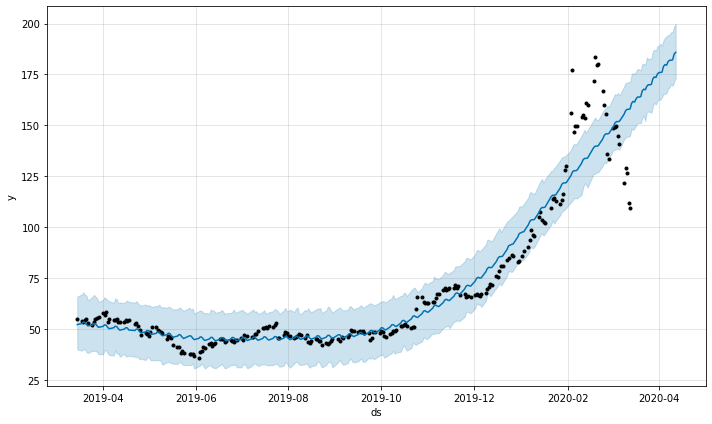

In [25]:
figure= m.plot(forecast,xlabel='ds', ylabel='y')

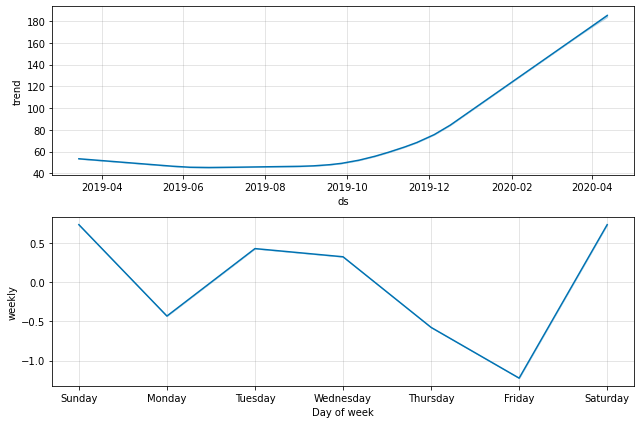

In [26]:
figure=m.plot_components(forecast)

##Downloading the Forecast data

In [27]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>